In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [4]:
Stock = pd.read_csv('/content/drive/MyDrive/linear regression/GOOGL.csv',  index_col=0)

df_Stock = Stock
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
Date,,,,,,,,,,,,,,,,,,,,,
2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,310.37,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,308.31,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,317.06,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,320.13,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,322.68,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25


In [5]:
df_Stock.shape

(3229, 63)

In [6]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

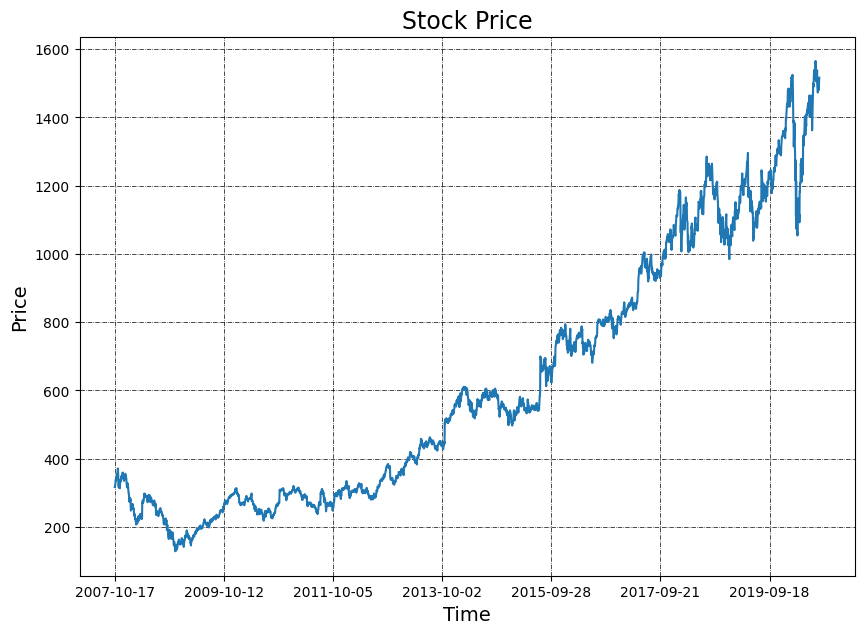

In [7]:
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [8]:
df_Stock = df_Stock.drop(columns='Date_col')

In [9]:
df_Stock.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Day', 'DayofWeek', 'DayofYear', 'Week',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month',
       'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)', 'QQQ_MA10', 'QQQ_MA20',
       'QQQ_MA50', 'SnP_Close', 'SnP(t-1))', 'SnP(t-5)', 'DJIA_Close',
       'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [10]:
def create_train_test_set(df_Stock):

    features = df_Stock.drop(columns=['Close_forcast'], axis=1)
    target = df_Stock['Close_forcast']


    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [12]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)


Historical Stock Data length is -  3229
Training Set length -  2841
Validation Set length -  322
Test Set length -  64
(2841, 61) (322, 61) (66, 61)
(2841,) (322,) (66,)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [14]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [-2.12227178e-02  1.18556322e-01  3.14527782e-01  1.16641284e+00
  9.27963928e-08  9.88169373e-03 -6.54417155e-03 -4.60707907e-02
 -3.00128079e-02  1.04184933e-01  6.93765669e-02  3.51672377e-02
  6.95319748e-02  1.83655331e-01  3.69162888e-01 -2.63074977e-02
 -7.55326986e-02  2.47124958e-02 -2.48796409e-01 -2.48796409e-01
 -2.48796409e-01 -2.48796409e-01 -2.48796409e-01 -9.58570201e-01
  6.19508797e-01 -9.62630620e-02 -3.64416922e-02 -1.93081112e-09
  8.86425775e-03  5.89285636e-02  9.24289700e-03  9.24289659e-03
 -3.42876804e+01 -5.74058312e-09 -1.78163262e-10  2.80069874e-01
 -3.47574183e-01 -2.66106805e-01 -1.22767367e-02 -7.46566427e-01
 -8.74515915e-01  1.12448576e+00 -7.20503269e-02 -8.49752171e-01
 -6.66133815e-15 -6.94030886e-01  4.74818367e-01  8.21479726e+00
 -8.69872110e-01  9.78434577e-01  5.52868724e-01  1.67607702e-01
 -1.34830321e+00  3.22267527e-01  1.33373336e-01  1.37381742e-01
 -1.32910312e-01 -4.53152337e-03 -1.52125077e-02  1.43748562e-02
  1.00

In [15]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9990983493503954


In [16]:
def get_mape(y_true, y_pred):
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 10

In [18]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [19]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.12
Training Mean Squared Error: 80.43
Training RMSE:  8.97
Training MAE:  5.76
 
Validation R-squared:  0.95
Validation Explained Variation:  0.95
Validation MAPE: 0.14
Validation Mean Squared Error: 80.43
Validation RMSE:  26.01
Validation MAE:  16.87
 
Test R-squared:  0.78
Test Explained Variation:  0.82
Test MAPE: 0.14
Test Mean Squared Error: 607.93
Test RMSE:  24.66
Test MAE:  19.91


In [21]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')

In [23]:
df_pred

,Date,Actual,Predicted
0,2019-01-31 00:00:00,1118.62,1126.264873
1,2019-02-01 00:00:00,1141.42,1118.131044
2,2019-02-04 00:00:00,1151.87,1139.733372
3,2019-02-05 00:00:00,1122.89,1143.017769
4,2019-02-06 00:00:00,1105.91,1118.366873
...,...,...,...
317,2020-05-05 00:00:00,1345.43,1339.532841
318,2020-05-06 00:00:00,1369.28,1339.216414
319,2020-05-07 00:00:00,1384.34,1361.989489
320,2020-05-08 00:00:00,1403.59,1372.787714


<Axes: >

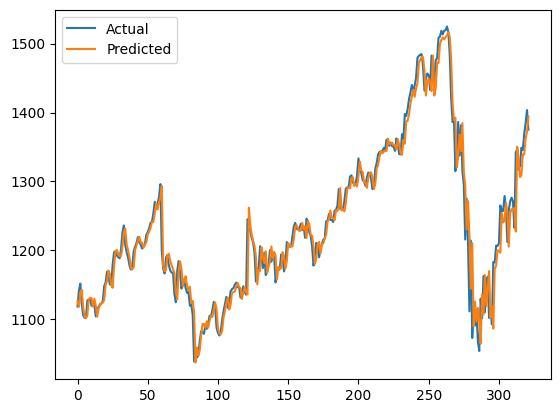

In [22]:
df_pred[['Actual', 'Predicted']].plot()